## SydneyRainfall-Prediction Model- ML Final Project 2

#### 1. Your views about the problem statement?

#### Ans- The problem states that as an ML expert at The DailyBuzz , it seems to involve predicting rainfall in Sydney,Australia based on various weather features that are given in study. It's a classification problem where the goal is likely to predict whether it will rain tomorrow or not.

#### 2. What will be your approach to solving this task

#### Ans-My approach would be to first understand the dataset, perform exploratory data analysis (EDA), handle missing values, null values, coverting features into proper data types and scale numerical features. Then, I would split the data into training and testing sets. After that, I'd experiment with different classification models, such as Logistic Regression, LDA,KNN,Bagging,Random Forest, Gradient Boosting, and XGBoost.

#### 3. What were the available ML model options you had to perform this task?

#### Ans-  I have used multiple machine learning models for this regression task such as                                                                                       
#### 1) Logistic Regression
#### 2) Linear Discriminant Analysis (LDA): 
#### 3) K-Nearest Neighbors (KNN)
#### 4) Decision Tree Classifier
#### 5) Bagging Classifier
#### 6) Random Forest Classifier
#### 7) Gradinet Bosting Classifier
#### 8) XGBoost

#### 4 .Which model’s performance is best, and what could be the possible reason for that?

#### Ans- After Performing all the above models, performance can be assessed based on metrics like confussion matrix,accuracy score, precision, recall values and after evaluating I have found that \RANDOM FOREST REGRESSION performed best out of all the other models , giving me the accuracy score of 0.8398203592814372 or 83.98%. And the possible reason can be because of  cleaning the data properly, feature engineering, training the models with proper parameters which helps in giving accurate scores/results.

#### 5. What steps can you take to improve this selected model’s performance even further?

#### Ans- Below steps can be taken to improve models performance-

#### 1) Hyperparameter tuning to achieve more precise tuning, based on the model's performance on validation data.
#### 2) Experimenting with other Ensemble Methods  to increase prediction accuracy, 
#### 3) Use of strong cross-validation techniques to ensure the model's generalization performance.
#### 4) Gathering more diverse and representative data to train the model.
#### 4) Explore feature engineering techniques to create new informative features or transform existing ones.


### Below is the Complete Breakdown of the dataset with all the Models Used to Train the data.`

## DATA EXPLORATION & PREPROCESSING

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Sydney_rain_prediction CSV file

df = pd.read_csv("C:/Users/Saptarag Kashyap/sydney_rain prediction.csv", header=0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.shape

(3337, 17)

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [6]:
# Convert "Date" column to datetime format

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [7]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

<Axes: xlabel='RainToday', ylabel='count'>

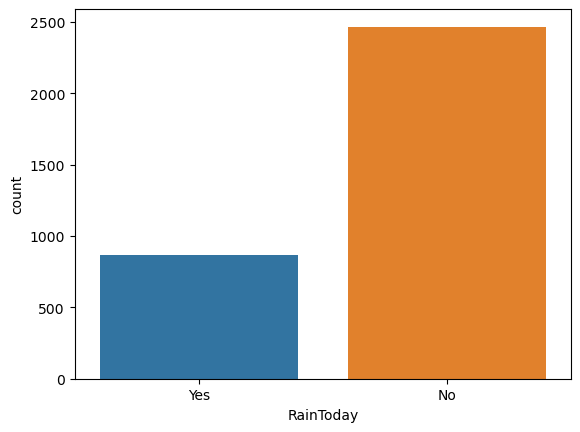

In [8]:
sns.countplot(x="RainToday", data=df)

<Axes: xlabel='RainTomorrow', ylabel='count'>

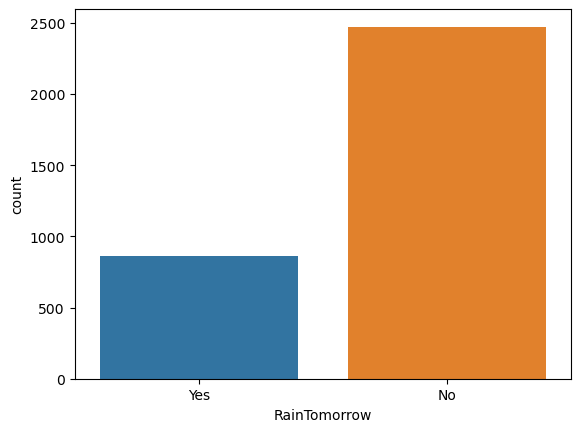

In [9]:
sns.countplot(x="RainTomorrow", data=df)

In [10]:
##Both "RainToday" and "RainTomorrow" are object (Yes/No). We will convert them into (1/0) for our convenience.

df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1


In [12]:
##checking for null values
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

#### so we can see there are null values

In [13]:
##checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   float64 

#### so we can see there are missing values

In [14]:
##findning total counts of features

numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

In [15]:
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 4
Continuous feature Count 12
Categorical feature Count 1


In [16]:
print(numerical_feature)

['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [17]:
print(discrete_feature)

['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']


In [19]:
print(continuous_feature)

['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [20]:
print(categorical_feature)

['Location']


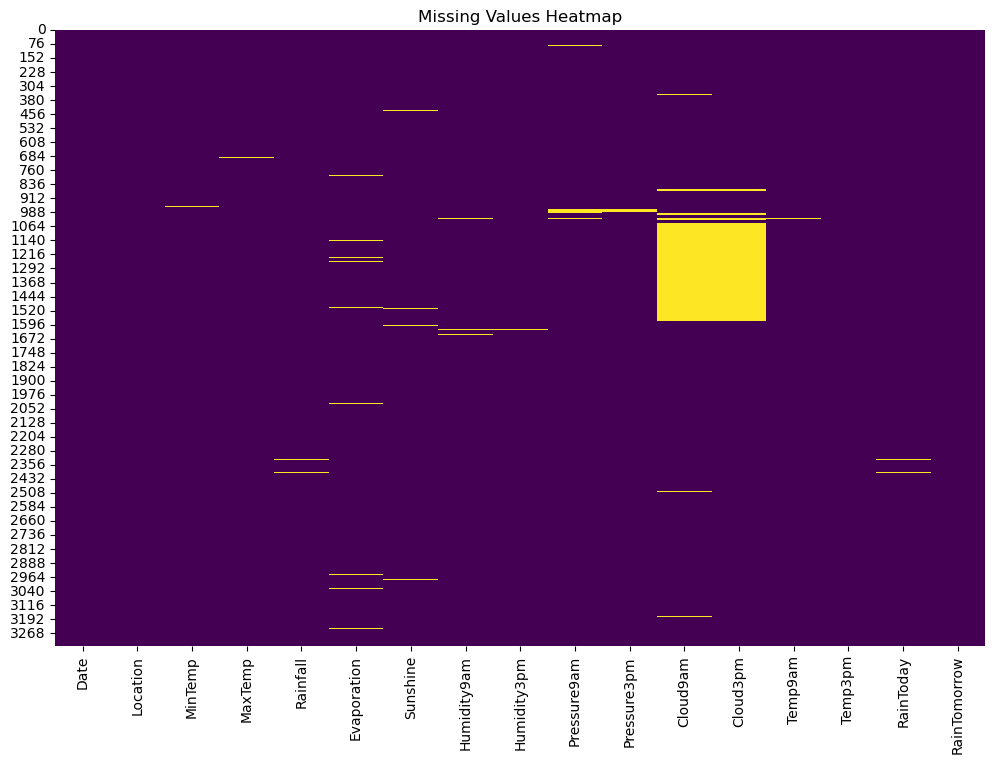

In [21]:
##Plotting Missing Values Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

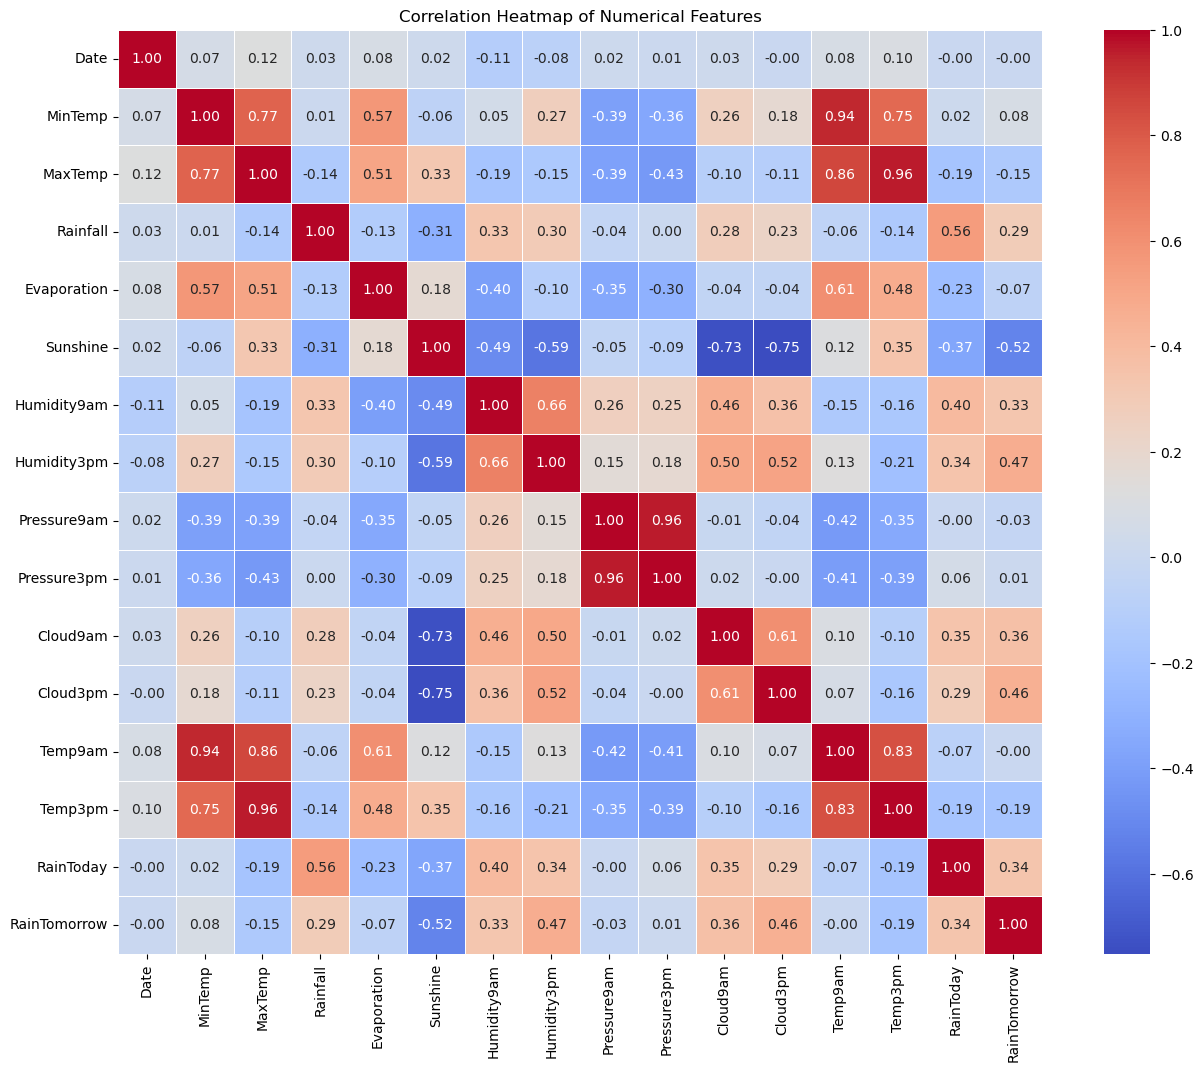

In [23]:
##Correlation Heatmap of Numerical Features

correlation = df[numerical_feature].corr()

plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap of Numerical Features')
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)
plt.show()

### Missing Value Imputation

In [24]:
##Handle missing values

df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   float64 

In [26]:
# Replace missing values in numeric columns with mean
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm',
                'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [27]:
# Replace missing values in discrete columns with mode
discrete_cols = ['Cloud9am', 'Cloud3pm']

for col in discrete_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [28]:
# Replace missing values in categorical columns with mode
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)


In [29]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   float64 

In [31]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

### So as we can see Null values and missing values are treated

In [32]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1
4,2008-02-05,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1


In [34]:
##As location is not adding much value to the dataset, so i am droppping it for now
df.drop(['Location'], axis=1, inplace=True)

In [35]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1
1,2008-02-02,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1
2,2008-02-03,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1
3,2008-02-04,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1
4,2008-02-05,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1


In [36]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,3.641894,4.686245,17.819742,21.533333,0.259515,0.259215
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,1.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,3.000000,6.000000,18.200000,21.300000,0.000000,0.000000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000
std,NaN,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.775528,2.624507,4.894240,4.301156,0.438434,0.438269


In [38]:
# Remove 'Date' from continuous features as this not helping with my data
continuous_feature_no_date = [feature for feature in continuous_feature if feature != 'Date']

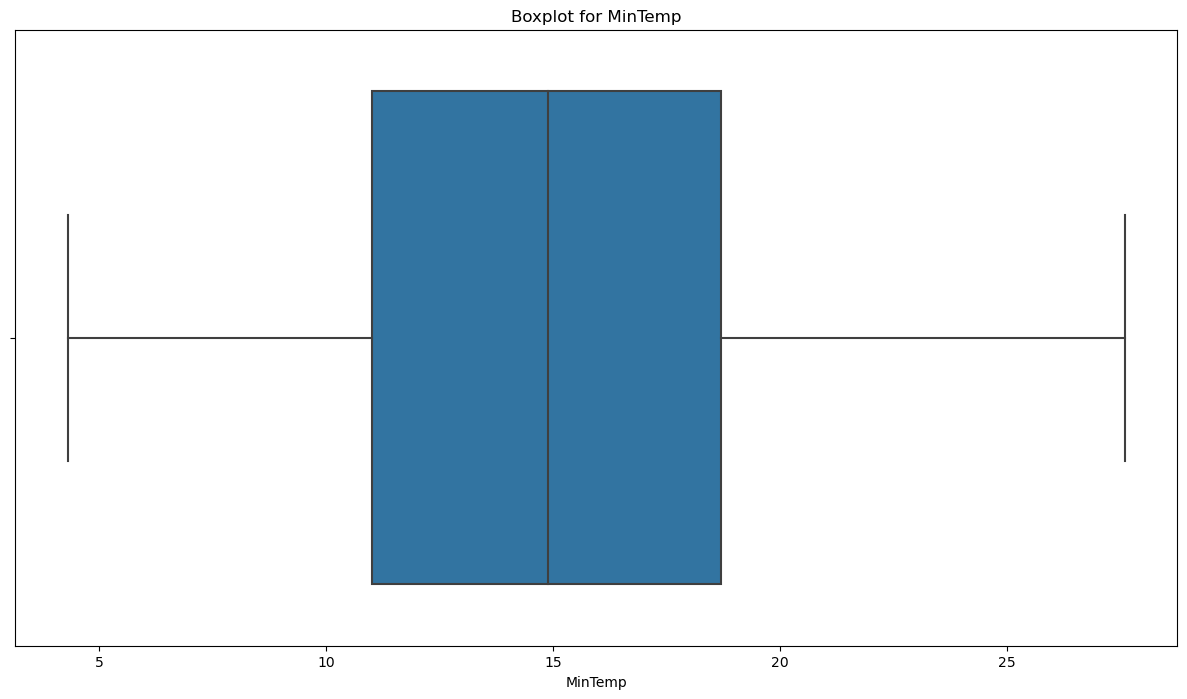

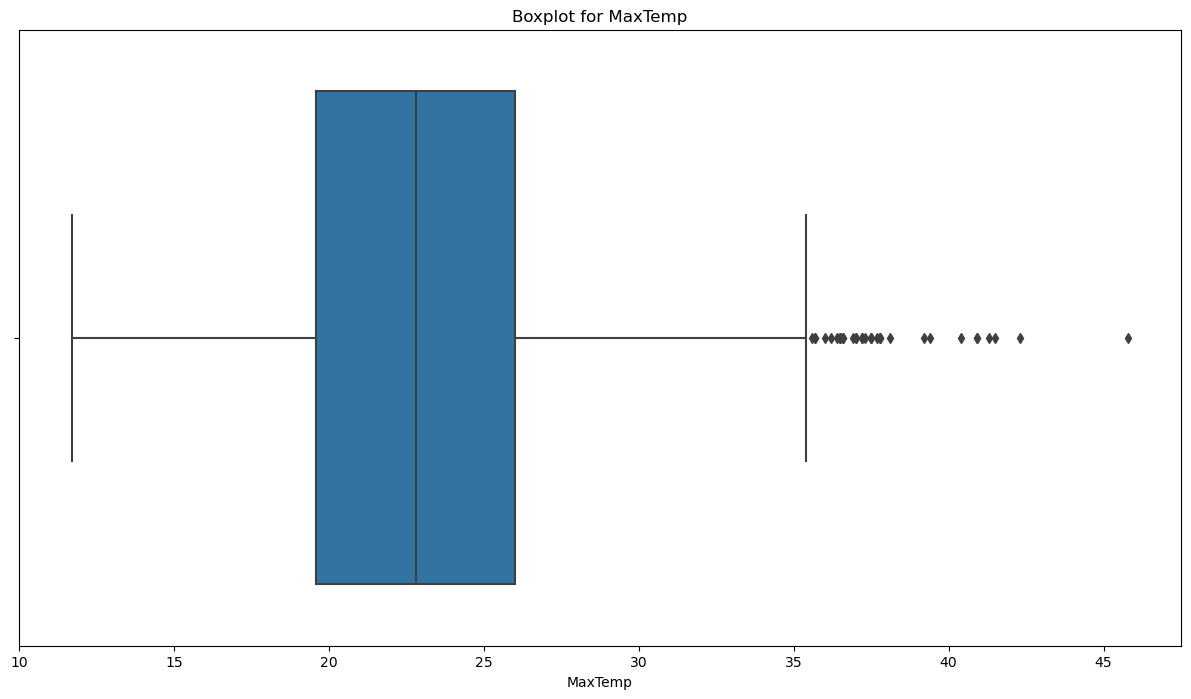

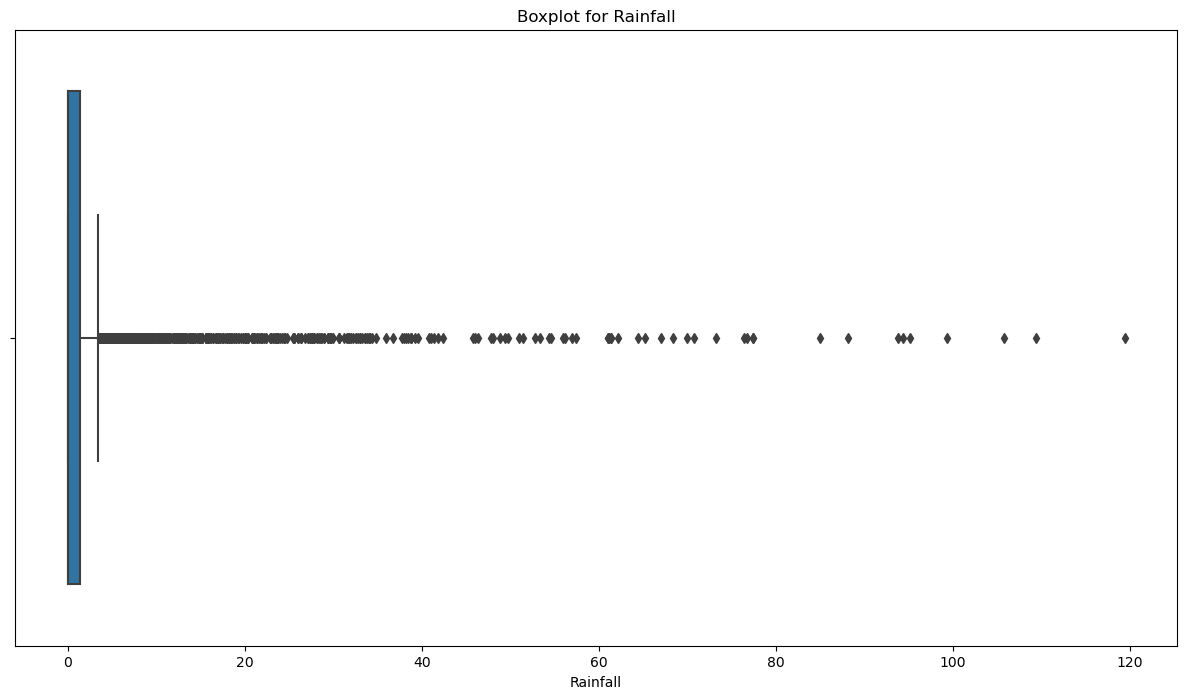

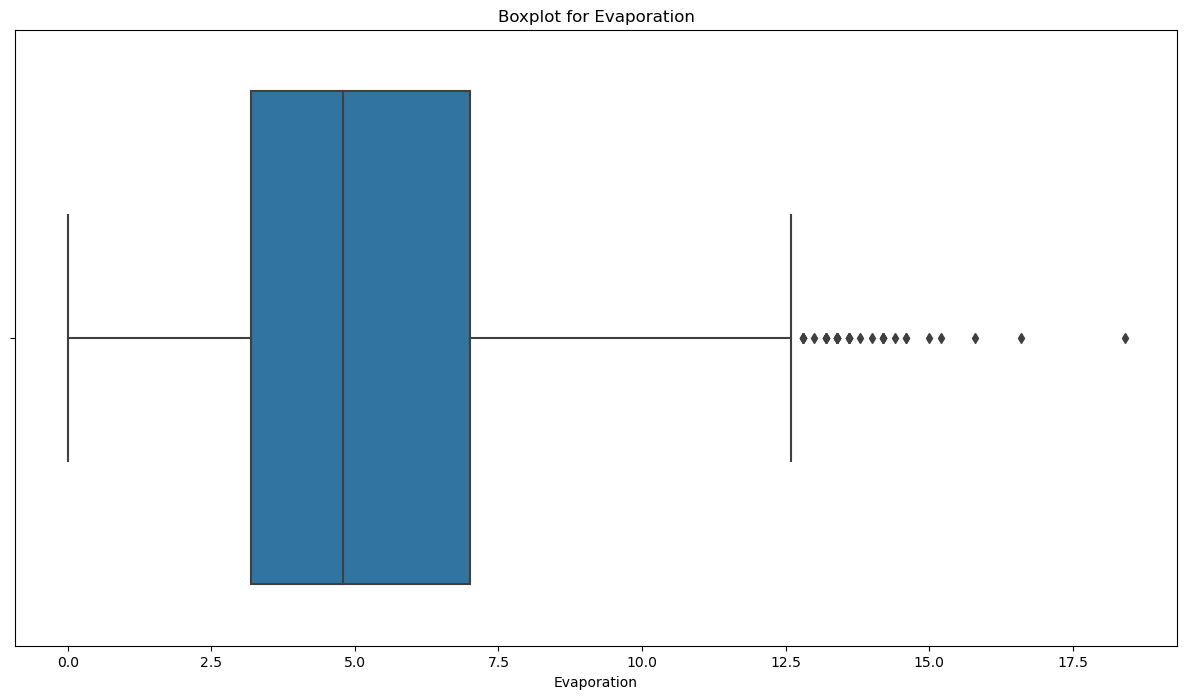

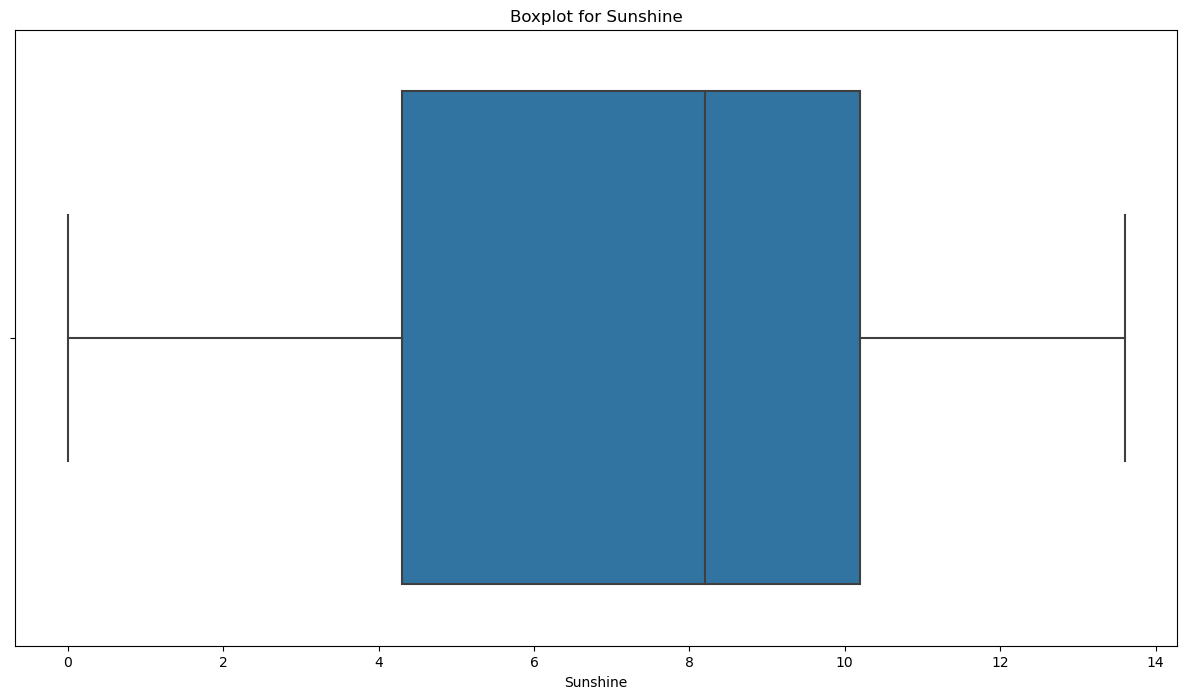

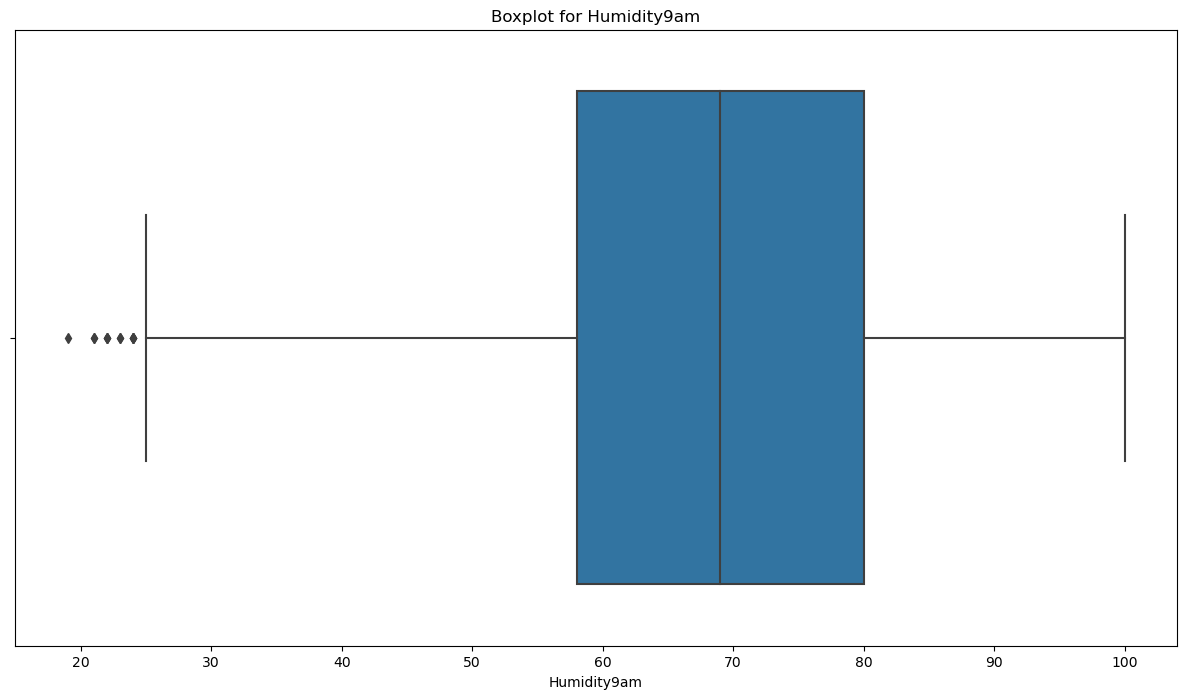

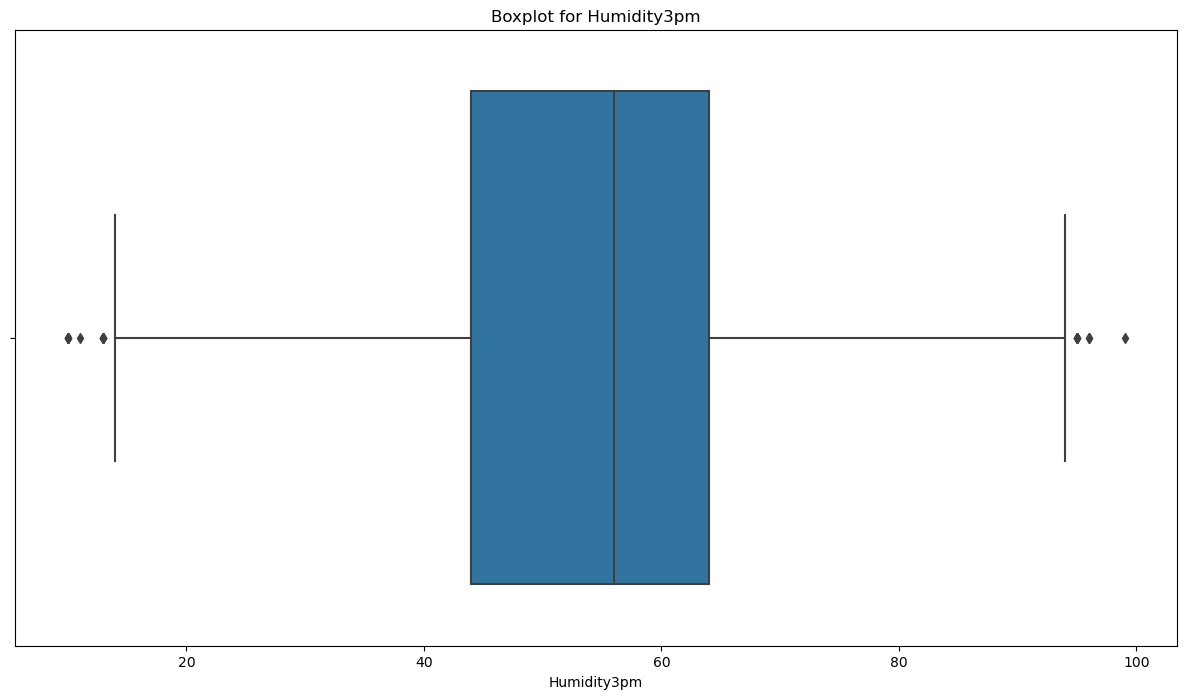

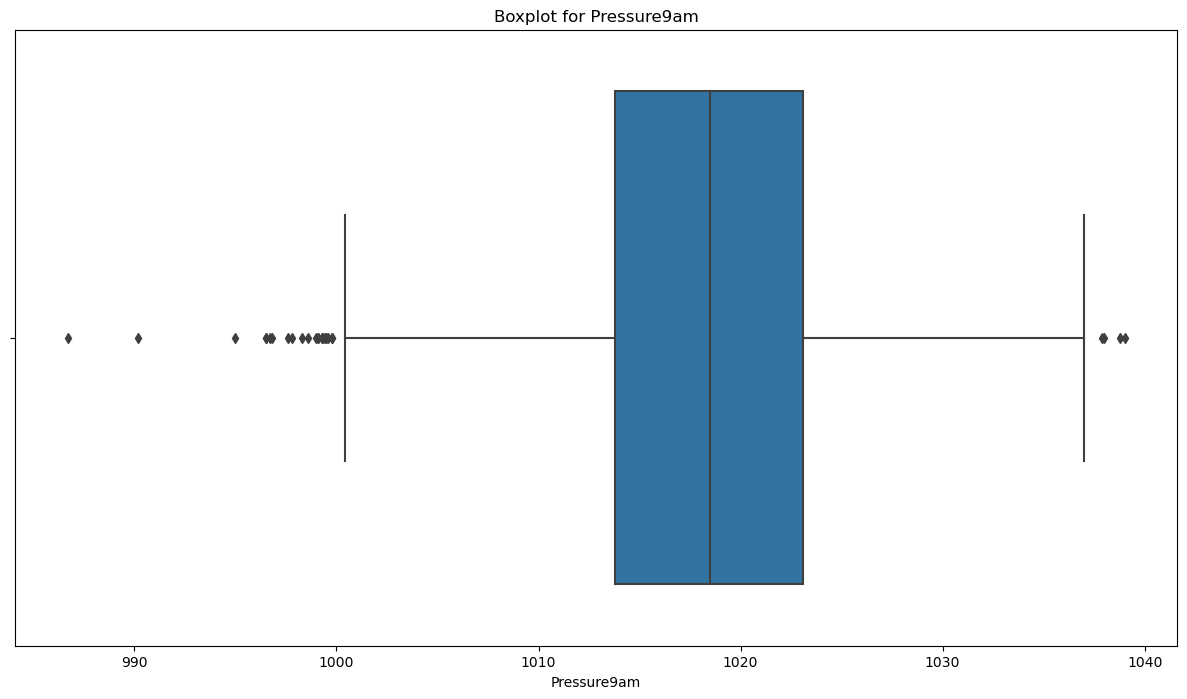

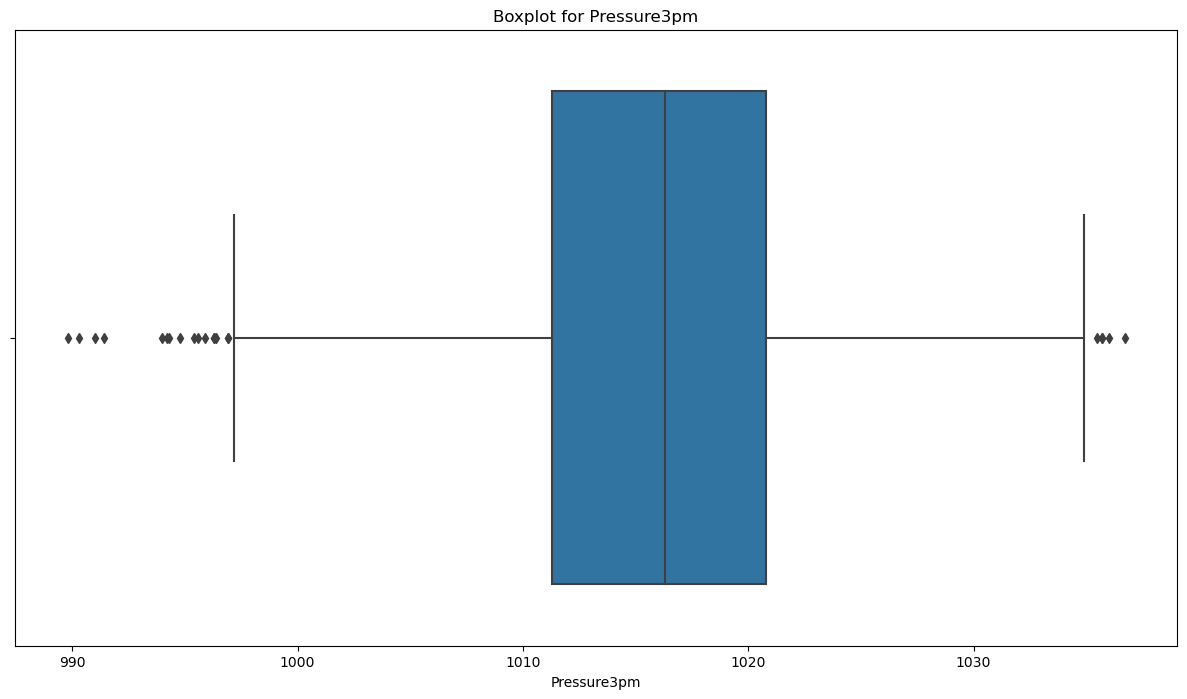

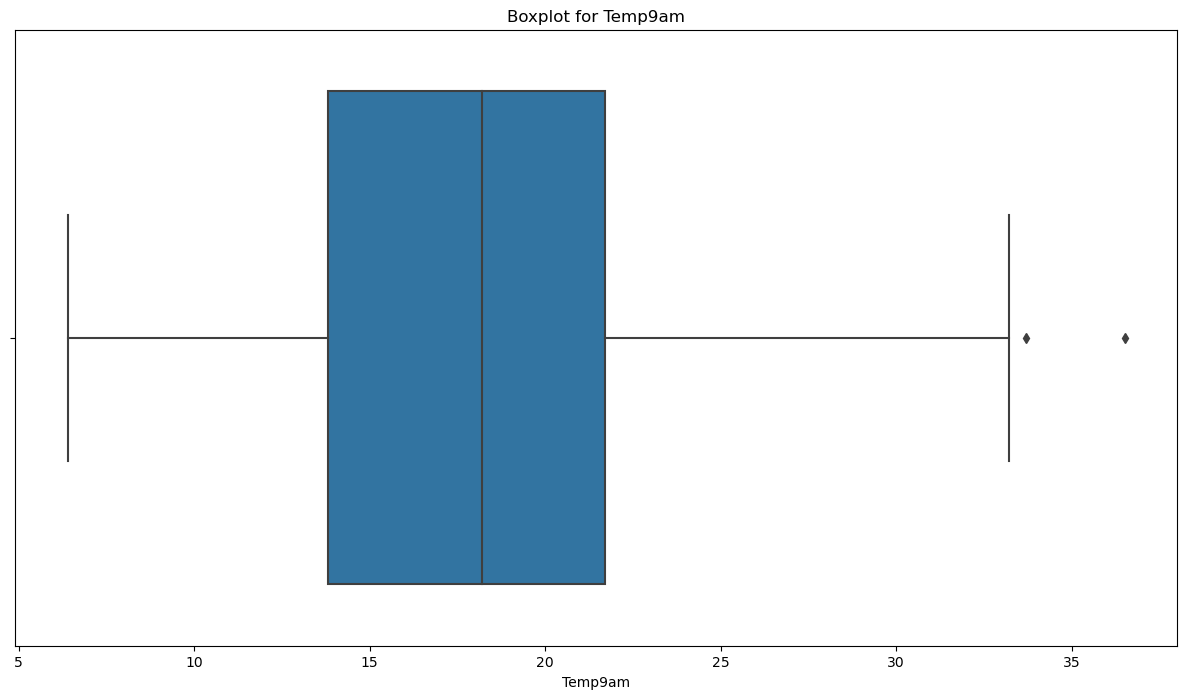

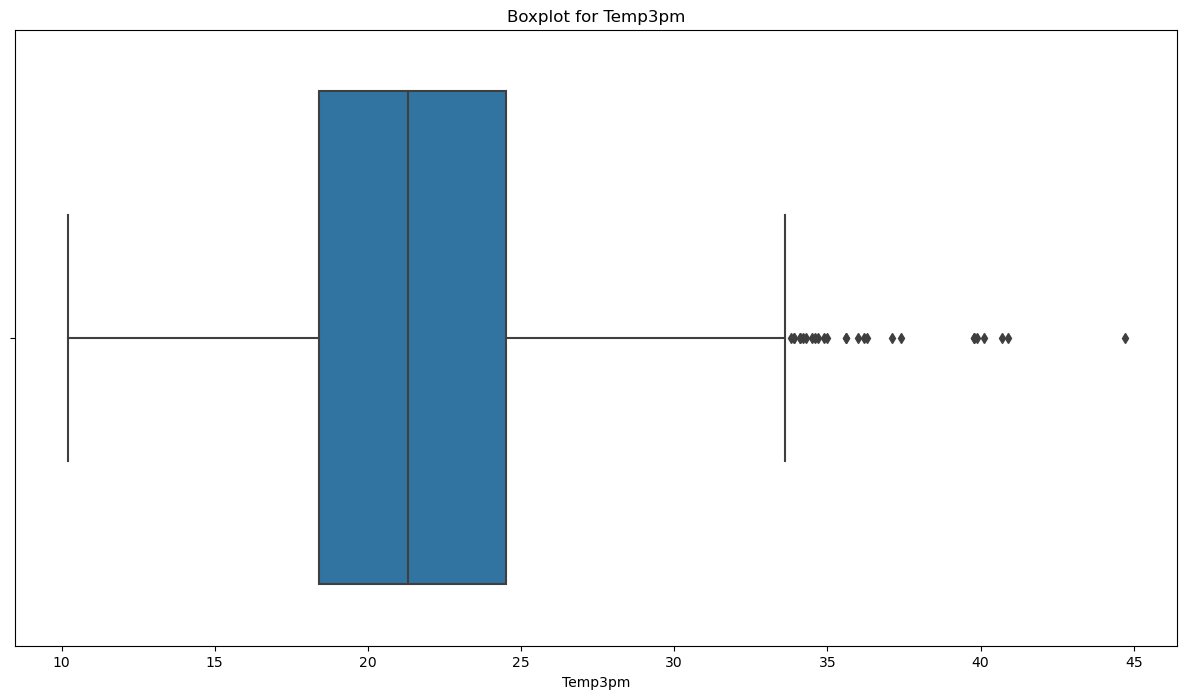

In [39]:
# Plot boxplots for each continuous feature excluding 'Date'
for feature in continuous_feature_no_date:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

### As we can see there are multiple Outliers in the dataset

In [40]:
##Handling Outliers using Interquartile Range(IQR) for each continuous feature

for feature in continuous_feature:
    print(feature)

Date
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [76]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.5499999999999989 30.25


In [77]:
df.loc[df['MinTemp']>=30.25,'MinTemp']=30.25
df.loc[df['MinTemp']<=-0.54,'MinTemp']=--0.54

In [78]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

10.000000000000004 35.599999999999994


In [79]:
df.loc[df['MaxTemp']>=35.59,'MaxTemp']=35.59
df.loc[df['MaxTemp']<=10.00,'MaxTemp']=10.00

In [80]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.0999999999999996 3.4999999999999996


In [81]:
df.loc[df['Rainfall']>=3.49,'Rainfall']=3.49
df.loc[df['Rainfall']<=-2.09,'Rainfall']=-2.09

In [82]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.499999999999999 12.7


In [83]:
df.loc[df['Evaporation']>=12.7,'Evaporation']=12.7
df.loc[df['Evaporation']<=-2.49,'Evaporation']=-2.49

In [84]:
IQR=df.Humidity3pm.quantile(0.75)-df.Humidity3pm.quantile(0.25)
lower_bridge=df.Humidity3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

14.0 94.0


In [85]:
df.loc[df['Humidity3pm']>=94.0,'Humidity3pm']=94.0
df.loc[df['Humidity3pm']<=14.0,'Humidity3pm']=14.0

In [87]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

25.0 113.0


In [88]:
df.loc[df['Humidity9am']>=113,'Humidity9am']=113
df.loc[df['Humidity9am']<=25,'Humidity9am']=25

In [89]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

999.8499999999999 1037.0500000000002


In [90]:
df.loc[df['Pressure9am']>=1037.05,'Pressure9am']=1037.05
df.loc[df['Pressure9am']<=999.84,'Pressure9am']=999.84

In [91]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

997.05 1035.05


In [92]:
df.loc[df['Pressure3pm']>=1035.05,'Pressure3pm']=1035.05
df.loc[df['Pressure3pm']<=997.05,'Pressure3pm']=997.05

In [93]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.9500000000000028 33.55


In [94]:
df.loc[df['Temp9am']>=33.55,'Temp9am']=33.55
df.loc[df['Temp9am']<=1.95,'Temp9am']=1.95 

In [95]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

9.249999999999996 33.650000000000006


In [96]:
df.loc[df['Temp3pm']>=33.65,'Temp3pm']=33.65
df.loc[df['Temp3pm']<=9.24,'Temp3pm']=9.24

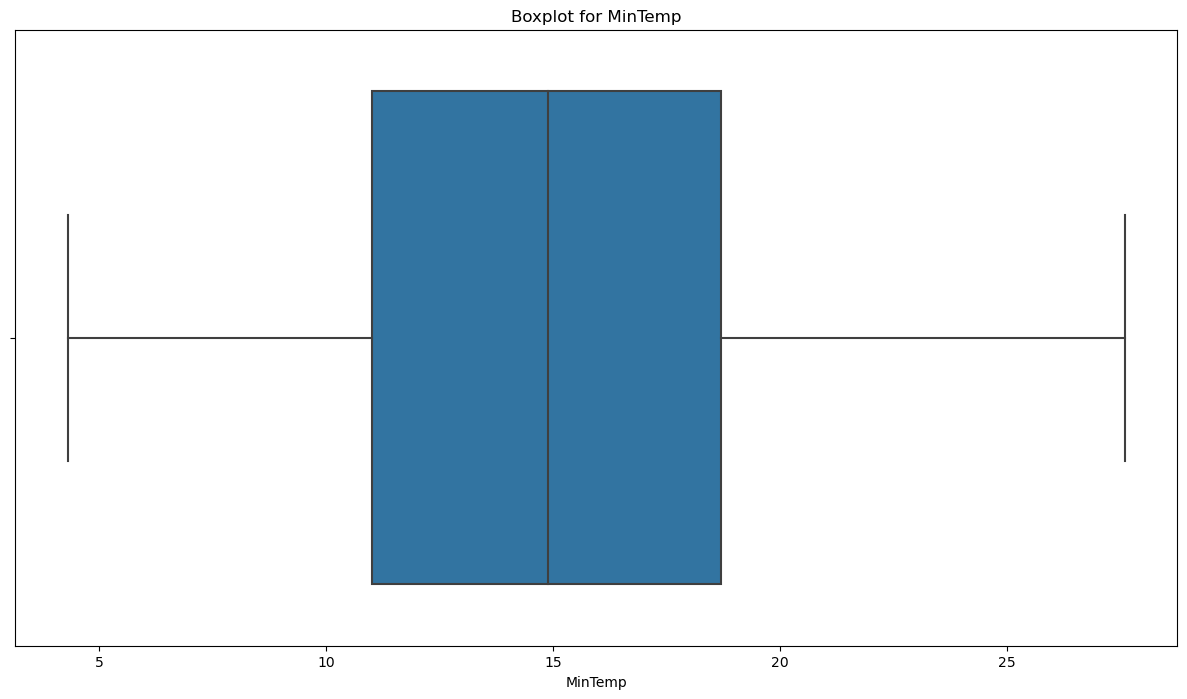

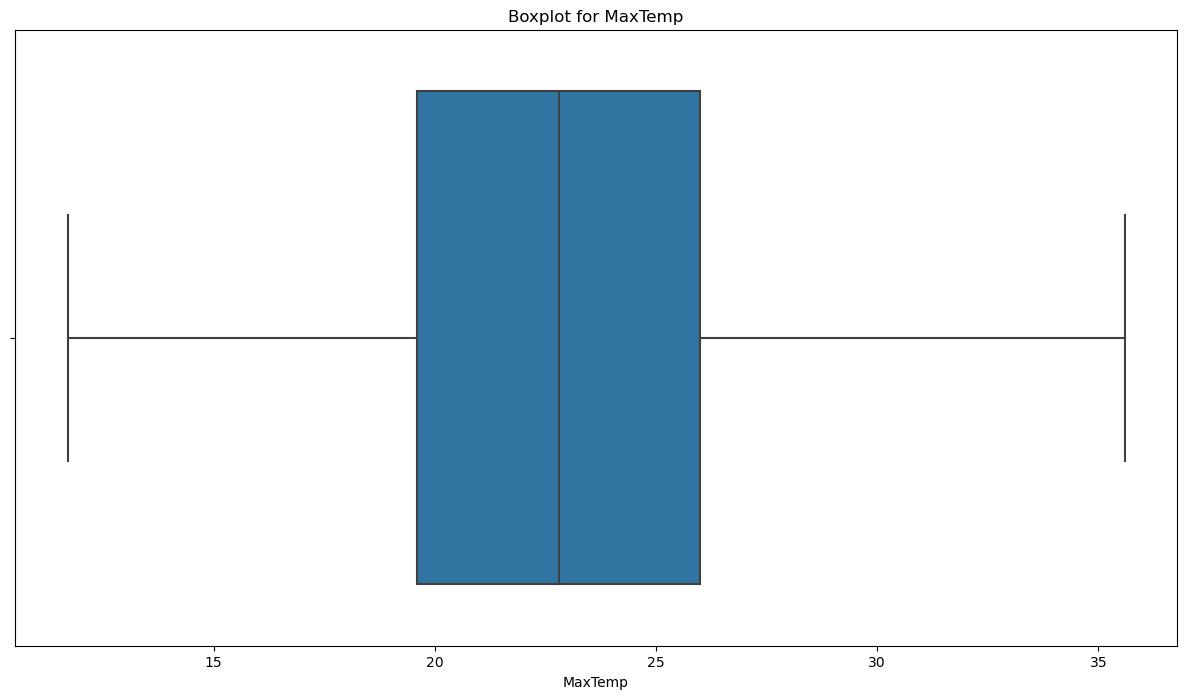

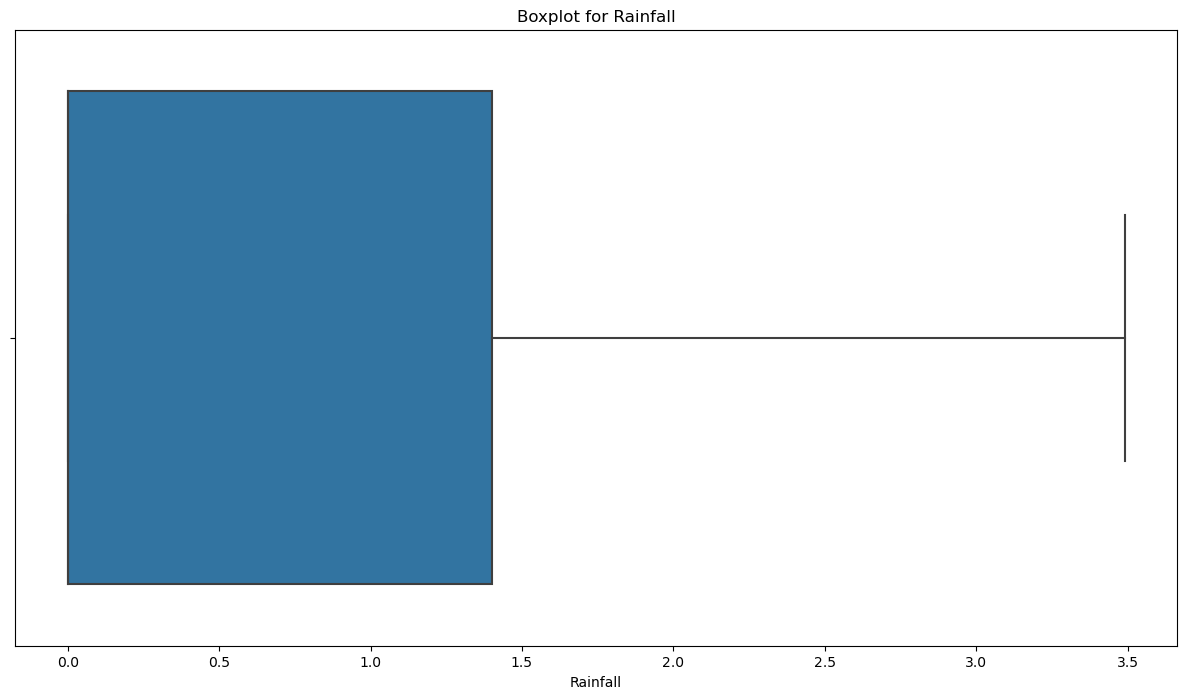

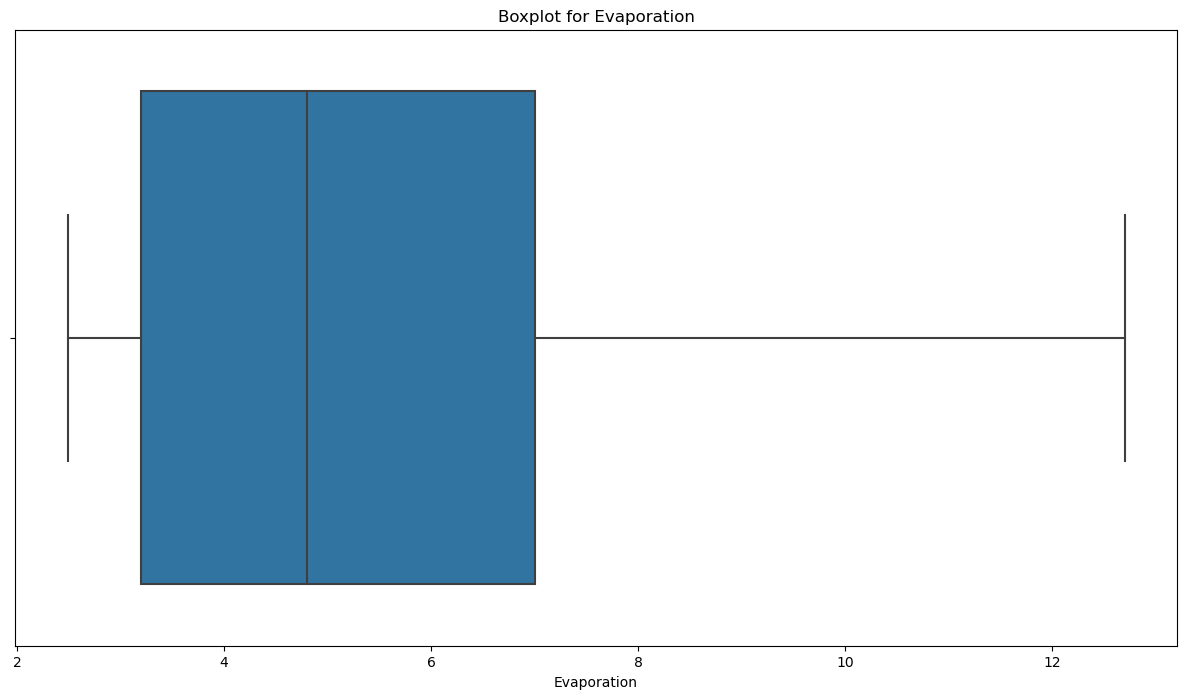

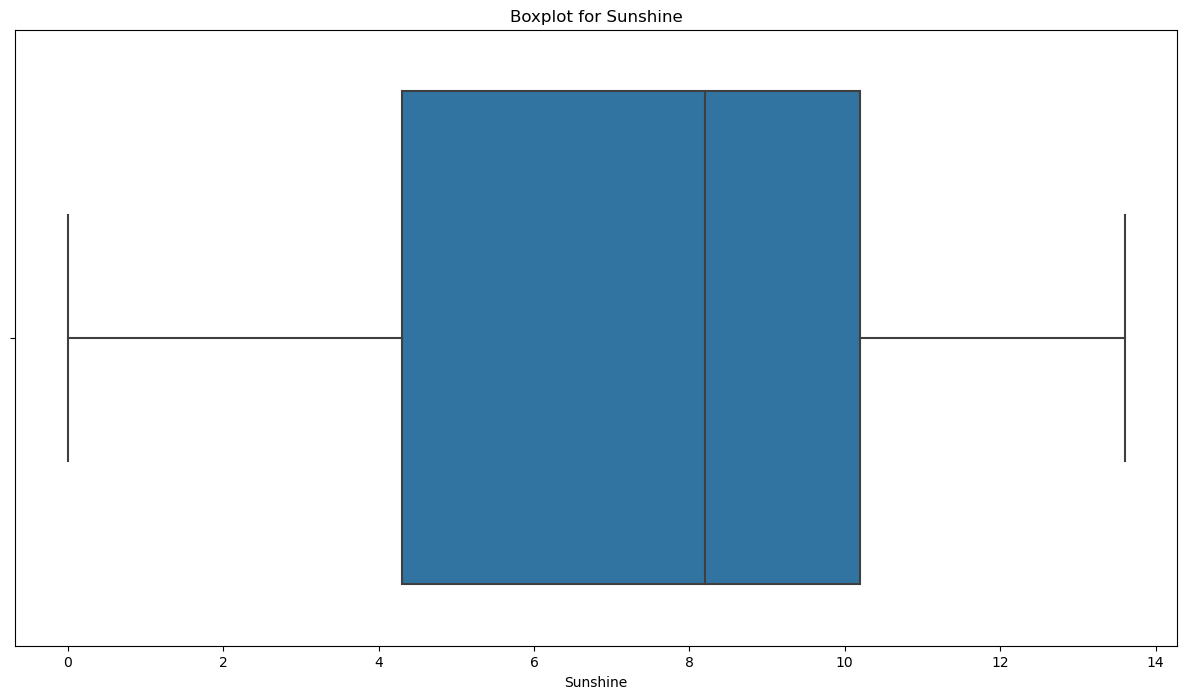

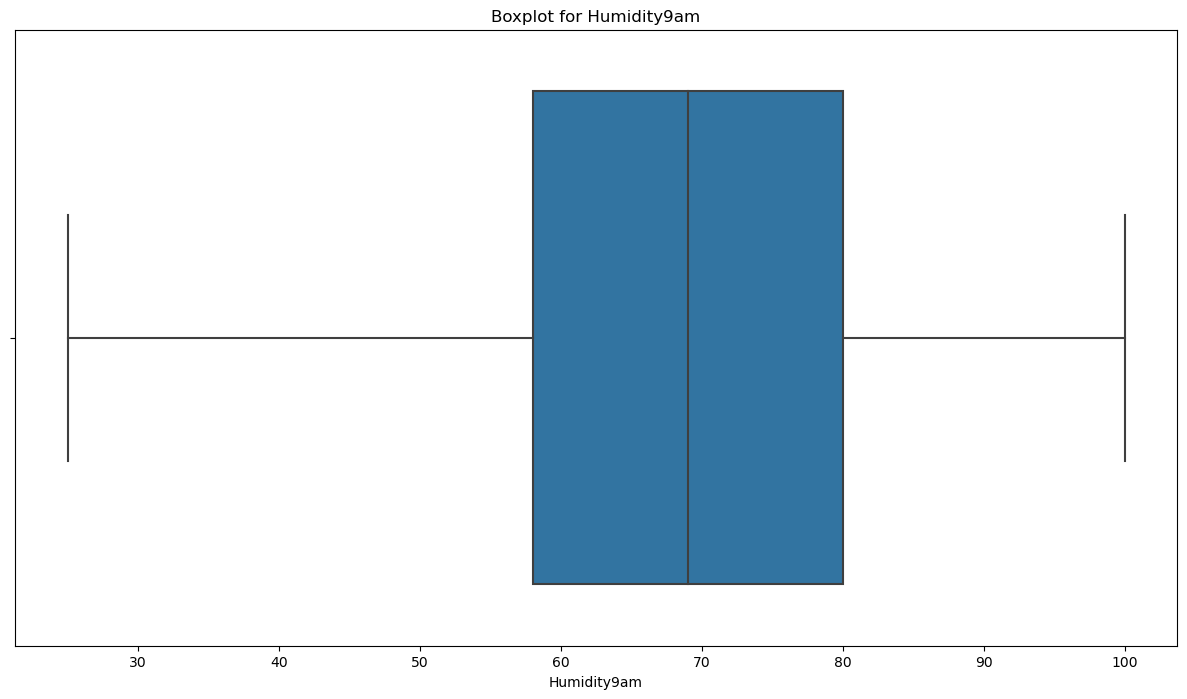

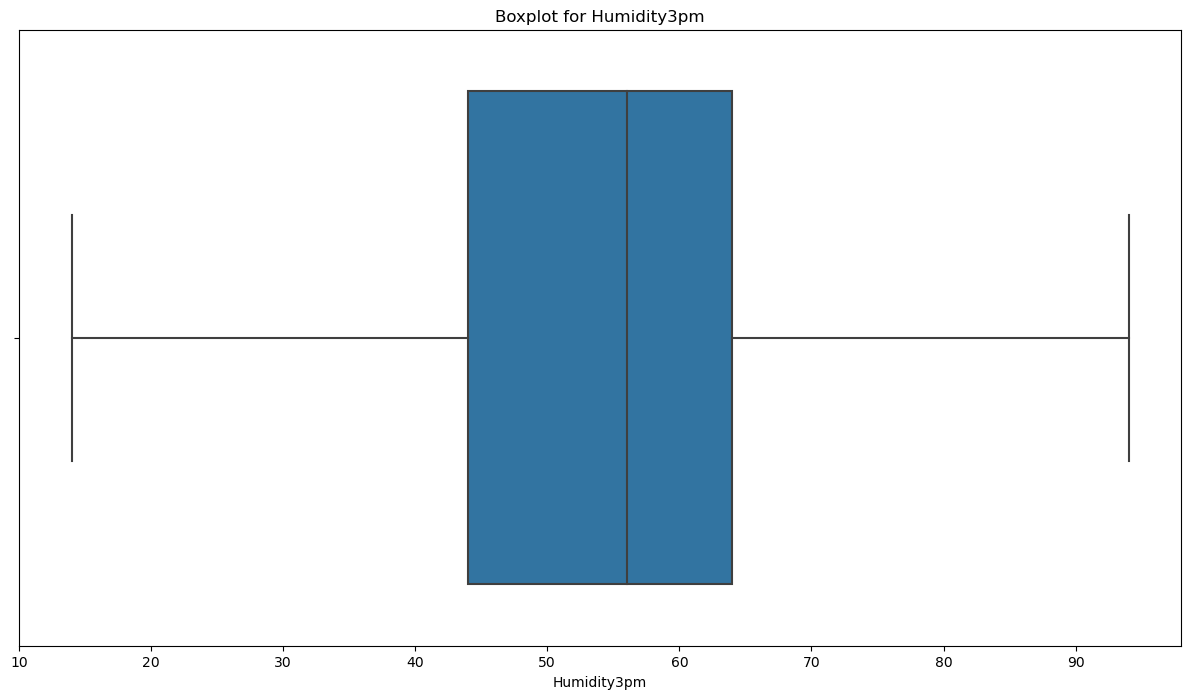

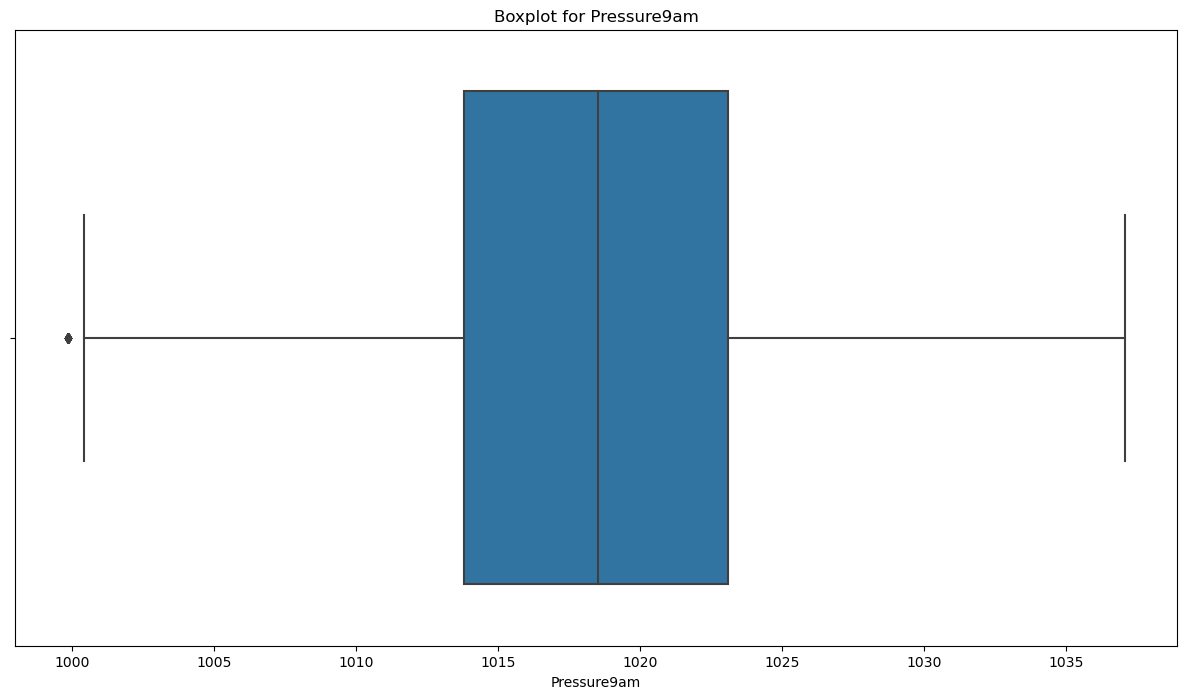

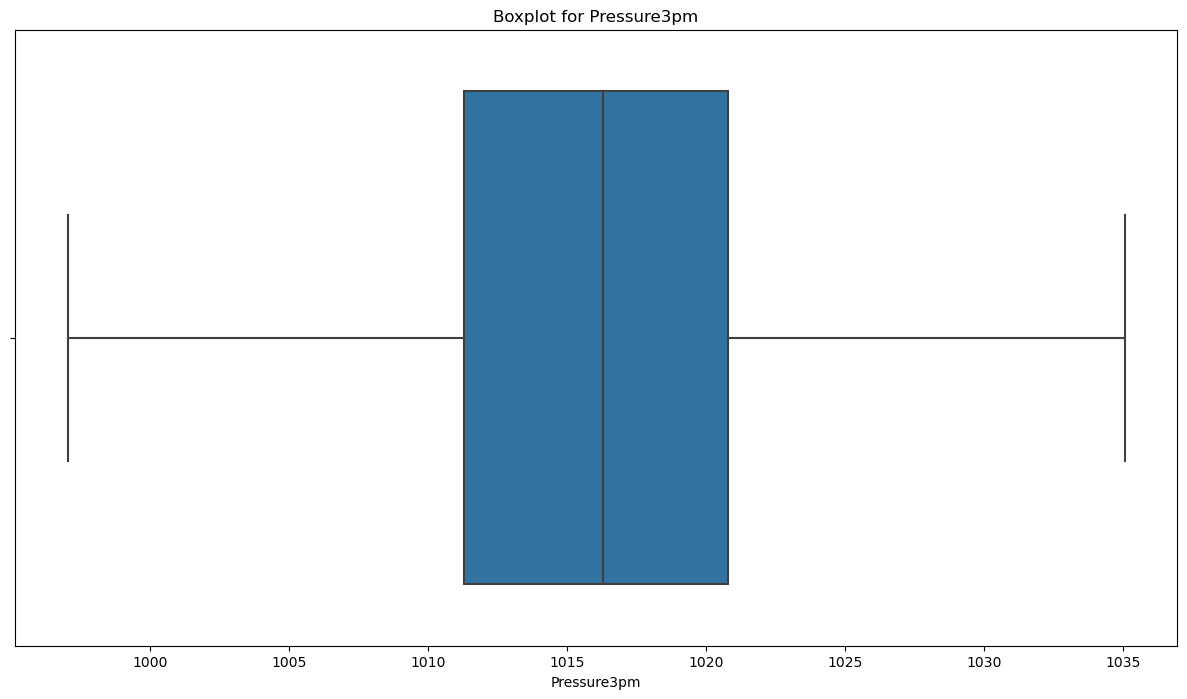

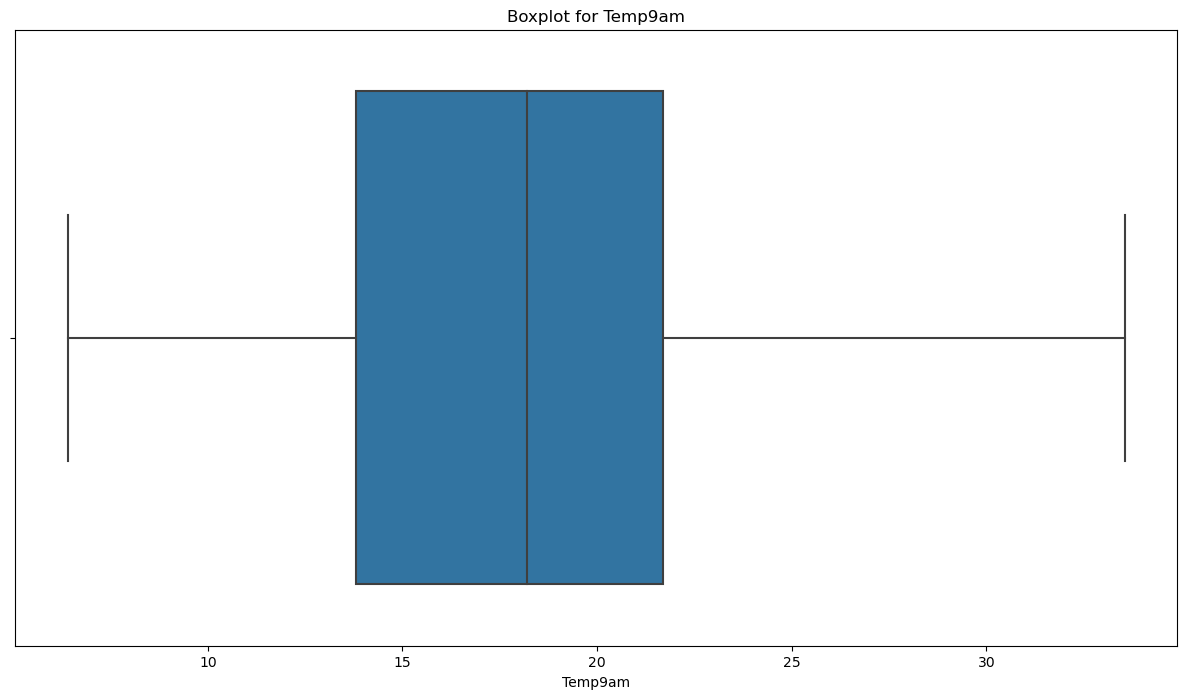

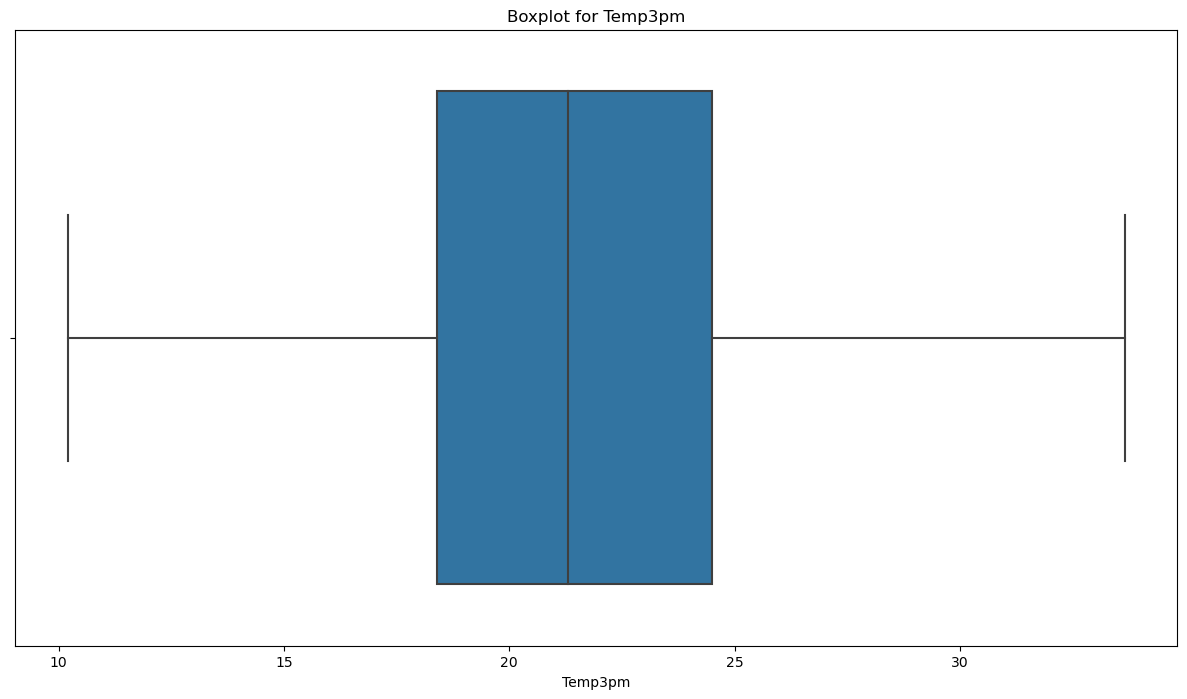

In [97]:
# Plot boxplots for each continuous feature excluding 'Date'
for feature in continuous_feature_no_date:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

### Now we can see from the boxplots that outliers are almost treated using IQR

## Logistic Regression

In [103]:
##X-y Split

X = df.drop(["RainTomorrow", "Date"], axis=1)
y = df["RainTomorrow"]

In [106]:
type(X)

pandas.core.frame.DataFrame

In [104]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,19.5,22.4,3.49,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0
1,19.5,25.6,3.49,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0
2,21.6,24.5,3.49,2.490000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0
3,20.2,22.8,3.49,2.490000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0
4,19.7,25.7,3.49,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0


In [105]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow, dtype: int64

In [108]:
type(y)

pandas.core.series.Series

### Train-Test Split

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [111]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
245,22.5,34.8,0.00,8.6,9.8,41.0,20.0,1014.8,1010.300,1.0,7.0,29.6,33.65,0.0
2258,6.6,21.3,0.00,2.6,9.4,49.0,22.0,1007.6,999.600,0.0,1.0,11.9,20.70,0.0
242,11.9,19.2,0.80,6.4,11.1,61.0,48.0,1020.3,1016.777,2.0,1.0,16.5,19.00,0.0
2747,17.7,20.1,3.49,9.0,0.0,81.0,70.0,1014.4,1013.400,8.0,8.0,18.7,18.90,1.0
2982,9.5,17.7,0.20,4.4,4.8,54.0,47.0,1004.0,1003.000,6.0,6.0,12.9,15.90,0.0


In [112]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
2332,12.3,20.2,0.2,4.80,10.6,55.0,51.0,1032.1,1028.9,4.0,1.0,16.9,18.9,0.0
575,14.8,25.7,0.0,9.20,5.2,51.0,59.0,1008.9,998.9,8.0,4.0,16.6,20.4,0.0
1051,15.4,27.8,0.0,8.40,13.5,36.0,26.0,1008.7,1007.9,1.0,1.0,21.3,27.1,0.0
1238,7.0,18.4,0.6,2.49,8.3,74.0,32.0,1020.0,1018.6,1.0,7.0,10.1,18.0,0.0
1826,11.1,22.9,0.0,3.00,10.2,72.0,51.0,1026.7,1020.5,1.0,7.0,14.0,20.9,0.0


In [113]:
y_train.head()

245     1
2258    0
242     0
2747    1
2982    1
Name: RainTomorrow, dtype: int64

In [114]:
y_test.head()

2332    0
575     0
1051    0
1238    0
1826    0
Name: RainTomorrow, dtype: int64

In [115]:
X_train.shape

(2669, 14)

In [116]:
X_test.shape

(668, 14)

In [117]:
from sklearn.linear_model import LogisticRegression

In [121]:
clf_lrs=LogisticRegression()

In [123]:
import statsmodels.api as sm

In [124]:
X_ols = sm.add_constant(X)

In [126]:
ols_model = sm.OLS(y, X_ols).fit()

In [127]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RainTomorrow   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     131.2
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          1.54e-304
Time:                        19:19:35   Log-Likelihood:                -1247.1
No. Observations:                3337   AIC:                             2524.
Df Residuals:                    3322   BIC:                             2616.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.4892      1.075      5.105      0.000       3.381       7.597
MinTemp        -0.0325      0.006     -5.914      0.000      -0.043      -0.022
MaxTemp         0.0128      0.006      2.275      0.023       0.002       0.024
Rainfall        0.0606      0.015      4.082      0.000       0.032       0.090
Evaporation     0.0107      0.003      3.097      0.002       0.004       0.017
Sunshine       -0.0421      0.003    -14.641      0.000      -0.048      -0.036
Humidity9am     0.0002      0.001      0.203      0.839      -0.001       0.002
Humidity3pm     0.0077      0.001      9.490      0.000       0.006       0.009
Pressure9am    -0.0161      0.004     -4.203      0.000      -0.024      -0.009
Pressure3pm     0.0108      0.004      2.910      0.004       0.004       0.018
Cloud9am       -0.0056      0.003     -1.997      0.046      -0.011      -0.000
Cloud3pm        0.0058      0.003      1.834      0.067      -0.000       0.012
Temp9am         0.0167      0.006      2.836      0.005       0.005       0.028
Temp3pm        -0.0049      0.007     -0.754      0.451      -0.018       0.008
RainToday      -0.0369      0.046     -0.797      0.426      -0.128       0.054
==============================================================================
Omnibus:                      260.627   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.016
Skew:                           0.738   Prob(JB):                     7.21e-71
Kurtosis:                       3.378   Cond. No.                     2.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score

In [143]:
clf_lrs = LogisticRegression()
clf_lrs.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
y_pred = clf_lrs.predict(X)

In [146]:
confusion_matrix(y,y_pred)

array([[2300,  172],
       [ 371,  494]], dtype=int64)

In [147]:
accuracy_score(y,y_pred)

0.8372789931075817

In [148]:
from sklearn.metrics import precision_score, recall_score

In [149]:
precision_score(y,y_pred)

0.7417417417417418

In [150]:
recall_score(y,y_pred)

0.5710982658959538

## LDA

In [151]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [152]:
clf_lda=LinearDiscriminantAnalysis()

In [153]:
clf_lda.fit(X,y)

LinearDiscriminantAnalysis()

In [154]:
y_pred_lda=clf_lda.predict(X)

In [155]:
y_pred_lda

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [156]:
confusion_matrix(y,y_pred_lda)

array([[2264,  208],
       [ 357,  508]], dtype=int64)

In [157]:
accuracy_score(y,y_pred_lda)

0.8306862451303566

In [159]:
precision_score(y,y_pred_lda)

0.7094972067039106

In [160]:
recall_score(y,y_pred_lda)

0.5872832369942197

## KNN

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [163]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2669, 14) (668, 14) (2669,) (668,)


In [164]:
from sklearn import preprocessing

In [165]:
scaler=preprocessing.StandardScaler().fit(X_train)

In [166]:
X_train_s=scaler.transform(X_train)

In [167]:
scaler=preprocessing.StandardScaler().fit(X_test)
X_test_s=scaler.transform(X_test)

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
clf_knn1=KNeighborsClassifier(n_neighbors=1)
clf_knn1.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [170]:
confusion_matrix(y_test,clf_knn1.predict(X_test_s))

array([[418,  92],
       [ 81,  77]], dtype=int64)

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
accuracy_score(y_test,clf_knn1.predict(X_test_s))

0.7410179640718563

In [173]:
clf_knn3=KNeighborsClassifier(n_neighbors=3)
clf_knn3.fit(X_train_s,y_train)
confusion_matrix(y_test,clf_knn3.predict(X_test_s))

array([[457,  53],
       [ 73,  85]], dtype=int64)

In [242]:
accuracy_score(y_test,clf_knn3.predict(X_test_s))

0.811377245508982

In [243]:
precision_score(y_test, clf_knn3.predict(X_test_s))

0.6159420289855072

In [244]:
recall_score(y_test, clf_knn3.predict(X_test_s))

0.5379746835443038


## Decision Tree

In [175]:
from sklearn import tree
clf_tree=tree.DecisionTreeClassifier(max_depth=3)

In [176]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [177]:
y_train_pred=clf_tree.predict(X_train)
y_test_pred=clf_tree.predict(X_test)

In [178]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [179]:
confusion_matrix(y_test,y_test_pred)

array([[457,  53],
       [ 73,  85]], dtype=int64)

In [180]:
accuracy_score(y_test,y_test_pred)

0.811377245508982

In [245]:
precision_score(y_test,y_test_pred)

0.6159420289855072

In [248]:
recall_score(y_test,y_test_pred)

0.5379746835443038

## Bagging

In [181]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree


In [182]:
clftree=tree.DecisionTreeClassifier()

In [183]:
bag_clf=BaggingClassifier(estimator=clftree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [184]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [185]:
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[467,  43],
       [ 76,  82]], dtype=int64)

In [249]:
accuracy_score(y_test,bag_clf.predict(X_test))

0.8218562874251497

In [251]:
precision_score(y_test,bag_clf.predict(X_test))

0.656

In [252]:
recall_score(y_test,bag_clf.predict(X_test))

0.5189873417721519

## Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [228]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [229]:
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[479,  31],
       [ 76,  82]], dtype=int64)

In [253]:
accuracy_score(y_test,rf_clf.predict(X_test))

0.8398203592814372

In [254]:
precision_score(y_test,rf_clf.predict(X_test))

0.7256637168141593

In [255]:
recall_score(y_test,rf_clf.predict(X_test))

0.5189873417721519

## Gradient Boosting

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

In [231]:
gb_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)


In [232]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [233]:
confusion_matrix(y_test,gb_clf.predict(X_test))

array([[469,  41],
       [ 73,  85]], dtype=int64)

In [256]:
accuracy_score(y_test,gb_clf.predict(X_test))

0.8293413173652695

In [257]:
precision_score(y_test,gb_clf.predict(X_test))

0.6746031746031746

In [258]:
recall_score(y_test,gb_clf.predict(X_test))

0.5379746835443038

## XG-Boost

In [202]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.1/99.8 MB 508.4 kB/s eta 0:03:17
   ---------------------------------------- 0.2/99.8 MB 871.5 kB/s eta 0:01:55
   ---------------------------------------- 0.3/99.8 MB 1.2 MB/s eta 0:01:22
   ---------------------------------------- 0.5/99.8 MB 1.8 MB/s eta 0:00:55
   ---------------------------------------- 0.9/99.8 MB 2.7 MB/s eta 0:00:38
    -----------------------------------

In [235]:
from xgboost import XGBClassifier

In [236]:
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)


In [237]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [238]:
y_pred_xgb = xgb_clf.predict(X_test)

In [239]:
confusion_matrix(y_test,xgb_clf.predict(X_test))

array([[469,  41],
       [ 74,  84]], dtype=int64)

In [259]:
accuracy_score(y_test,xgb_clf.predict(X_test))

0.8278443113772455

In [260]:
precision_score(y_test,xgb_clf.predict(X_test))

0.672

In [261]:
recall_score(y_test,xgb_clf.predict(X_test))

0.5316455696202531

## Conclusion

### After Performing all the models we can see that Random Forest Performed best out of all with 0.8398203592814372 or 83.98%.